In [14]:
#EDA For the TX Winter Tweet Databases

#Importing and changing to local directory
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
os.chdir(r'C:\Users\micha.DESKTOP-U2HVTMF\MyPythonScripts\Jupyter\TX Tweets\tx-winter-tweets')


First, taking a look at the texas_wind dataframe for tweets that mention the word wind.

In [15]:
df = pd.read_csv('texas_wind.csv')
df.head()

,id_str,user_name,text,hashtags,created,user_followers,user_friends,user_favorites,expanded_url,user_description,user_created,user_location,source,usr_mentions
0,1363322557118570496,allinwithchris,"“Did AOC, 10 years ago at the tender age of 21...",NaN,2021-02-21T03:00:01,401228,846,794,https://twitter.com/i/web/status/1363322557118...,@chrislhayes hosts the Emmy Award-winning “All...,2013-03-21T15:59:46,NaN,TweetDeck,NaN
1,1362862496067952643,KurtSchlichter,RT @ThePeoplesCube: BREAKING: Biden administra...,TexasBlackout,2021-02-19T20:31:54,291341,2319,1619,NaN,Free speech absolutist | Loud + Proud Conserva...,2008-12-13T00:09:25,Manhattan Beach CA,Twitter Web App,NaN
2,1363330627991343104,TrueFactsStated,RT @DrEricDing:Let this sink in—Congresswoman ...,NaN,2021-02-21T03:32:05,226652,4300,252411,NaN,Chair of Mad Dog Pac. Worked in Clinton White ...,2014-11-23T23:31:32,DC and on the road.,Twitter for iPhone,"DrEricDing,AOC"
3,1363336464503816194,PsychicHealerC,RT @DrEricDing:What sent Texas reeling is not ...,NaN,2021-02-21T03:55:17,142051,149845,337588,NaN,"Mom, #Life, Steeler's, Writer, Psychic LifeCoa...",2011-07-29T10:42:09,"Ohio, USA",Twitter for Android,DrEricDing
4,1362861852619726848,nomadicmatt,We don’t have drinkable water in Texas but we ...,NaN,2021-02-19T20:29:21,120502,1233,605,NaN,NYT best selling author of How to Travel the W...,2008-10-04T06:27:54,Around the World,Twitter for iPhone,NaN


In [16]:
for item in df['text'].head():
    print(item + '\n')

“Did AOC, 10 years ago at the tender age of 21, parachute into the state of Texas to put up windmills under cover of night?” says Hayes of the GOP blaming power crisis on “green energy,” despite holding "nearly every statewide office in Texas for decades." https://t.co/XKEtt3bmin

RT @ThePeoplesCube: BREAKING: Biden administration sends emergency wind turbines to help fight #TexasBlackout

RT @DrEricDing:Let this sink in—Congresswoman @AOC from Bronx &amp; Queens raised over $4 million for people suffering in Texas.

While Ted Cruz went to Cancun, Rick Perry &amp; others blamed wind power that’s &lt;12% of actual shortage.

➡️Donate to help Texas—let’s keep it going! https://t.co/cMe9wtKnaI

RT @DrEricDing:What sent Texas reeling is not an engineering problem, nor frozen wind turbines. It is a structure that offers no incentives to prepare for winter. In the name of deregulation and free markets— electric grid that puts cheap prices over reliable service. 🧵
https://t.co/KrcC8fJr5M http

#### Quick thoughts
This dataframe is sorted by followers, meaning that these tweets are made by people in texas with the most followers during the storm. Despite lots of information being spread around, it looks like most of the top tweets are news-based by news sources or retweets from reputable sources.

In [17]:
#Checking hashtags
hashtags = {}
for tag in df['hashtags']:
    if tag in hashtags:
        hashtags[tag] += 1
    else:
        hashtags[tag] = 1

hashtags

{nan: 190,
 'TexasBlackout': 9,
 'Texas': 3,
 'FFS,TexasPowerOutages': 1,
 'NY21': 1,
 'Texas,WinterStorms': 1,
 'weatherize,solar,wind': 1,
 'BreakingNews,bbcnews': 1,
 'windturbines': 1}

Looks like most people don't even use hashtags and none of the tags are calling for anything radical.

In [18]:
#Looking at tweets with least followers
for item in df['text'].tail(10):
    print(item + '\n')

RT @DrEricDing:Let this sink in—Congresswoman @AOC from Bronx &amp; Queens raised over $4 million for people suffering in Texas.

While Ted Cruz went to Cancun, Rick Perry &amp; others blamed wind power that’s &lt;12% of actual shortage.

➡️Donate to help Texas—let’s keep it going! https://t.co/cMe9wtKnaI

RT @doctorow:There are windmills in northern Canada. In Norway. At the ANTARCTIC RESEARCH STATIONS. If Texas's windmills shut down during the storm, it's not because we don't know how to make cold-weather windmills - it's because allowing windmills to fail in cold weather was profitable.

13/

RT @DrEricDing:Let this sink in—Congresswoman @AOC from Bronx &amp; Queens raised over $4 million for people suffering in Texas.

While Ted Cruz went to Cancun, Rick Perry &amp; others blamed wind power that’s &lt;12% of actual shortage.

➡️Donate to help Texas—let’s keep it going! https://t.co/cMe9wtKnaI

So it wasn’t the windmills after all😂

RT @hotdawg74:@TepbyB @RepDanCrenshaw The west Tex

Most of these tweets with authors that have ~5000 or less followers also happen to be retweets from big sources. However, some of the sentiments here have subtle implications towards the misinformation that was being spread around. This probably wouldn't be something that would be picked up by NLP, with an example being the last tweet mentioning MW of wind failing but not mentioning the percentage that was, which was about <10% of the total energy that failed. This dataframe doesn't contain the content of the comments, where you would find users with less followers interacting with each other. That may be where most of the misinformation was spread rather than the big influencers - although there were some individuals out there who initially placed the blame onto wind i.e. Tucker Carlson.

<AxesSubplot:>

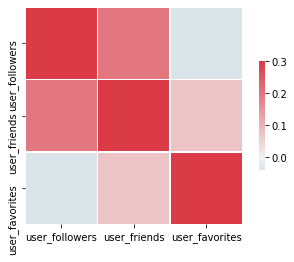

In [20]:
#Creating heatmap with numerical variables.
corr = df[['user_followers', 'user_friends', 'user_favorites']].corr()
cmap = sns.diverging_palette(230, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

This information isn't too relevant to the content of the tweets, but there seems to be a positive correlation between user followers and friends, which is intuitive.

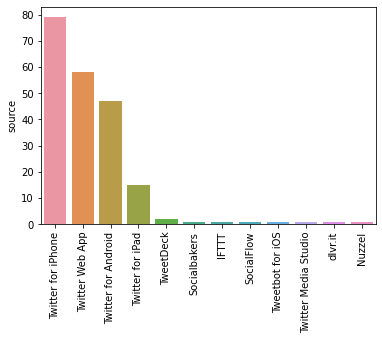

In [24]:
#Some barplots of categorical variables

#Barplot of tweet source

sns.barplot(x=df['source'].value_counts().index, y=df['source'].value_counts())
plt.xticks(rotation = 90)
plt.show()

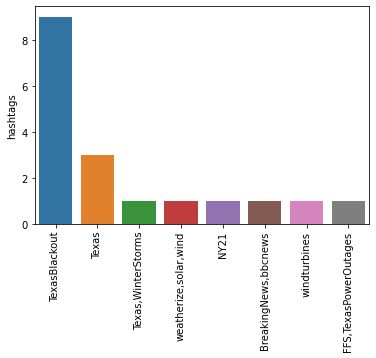

In [25]:
sns.barplot(x=df['hashtags'].value_counts().index, y=df['hashtags'].value_counts())
plt.xticks(rotation = 90)
plt.show()

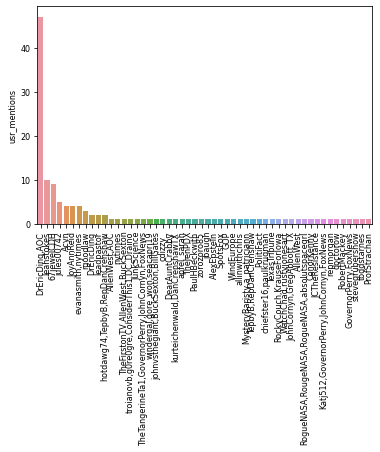

In [34]:
plt.rcParams.update({'font.size': 8})
sns.barplot(x=df['usr_mentions'].value_counts().index, y=df['usr_mentions'].value_counts())
plt.xticks(rotation = 90)
plt.show()

Looks like most of the tweets don't come from third-party mirrors, although there are a couple. The visualization of the tweets matches the info from the dictionary earlier. There's a lot of different mentions, but it looks like most of them come from the retweets of AOC. Nothing too suprising, but interesting to see just how many people end up parroting the same information.

After seeing how many of the tweets have the same mentions of users as a result of retweeting, looking at how many of all the tweets mentioning wind are retweets.

In [40]:
hasRT = []
for tweet in df['text']:
    if 'RT' in tweet:
        hasRT.append(True)
    else:
        hasRT.append(False)
df['hasRT'] = hasRT
df['hasRT'].head(10)

0    False
1     True
2     True
3     True
4    False
5    False
6     True
7    False
8     True
9     True
Name: hasRT, dtype: bool

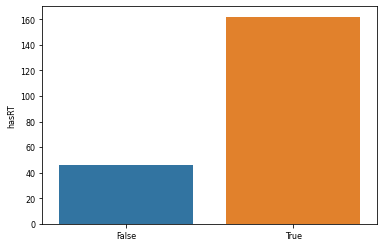

In [41]:
sns.barplot(x=df['hasRT'].value_counts().index, y=df['hasRT'].value_counts())
plt.show()

Very interesting seeing that a vast majority of the tweets happen to be retweets. This has positive and negative implications: it can be used to counteract misinformation when there is misinformation spreading, but it can also be the medium by which misinformation spreads. It ultimately depends on the influential users' beliefs and whether or not they ultimately decide to share information that they find from other users.

In [ ]:
## Examine other words' dataframes
## Analyze tweets df as a whole rather than just wind
## Create model identifying what other tweets get retweeted: can see what information of misinformation is getting spread